### Project --User Return Prediction
I solved a problem for startup compony website. it will help alot to find out the user behavior. then compony esay to make the dicision . how to sale our product using user behaavior. and what kind of user visit in our website.

In [33]:
import numpy as  np 
import pandas as pd 
import matplotlib.pyplot as plt 
 

In [34]:
df = pd.read_csv("rawdata.csv")
df.head()

,Page Views,Session Duration,Bounce Rate,Traffic Source,Time on Page,Previous Visits,Conversion Rate
0,5,11.051381,0.230652,Organic,3.890460,3,1.0
1,4,3.429316,0.391001,Social,8.478174,0,1.0
2,4,1.621052,0.397986,Organic,9.636170,2,1.0
3,5,3.629279,0.180458,Organic,2.071925,3,1.0
4,5,4.235843,0.291541,Paid,1.960654,5,1.0


In [35]:
df['Timespend']= ((df['Session Duration']+df['Time on Page']))
df.drop(columns=['Session Duration', 'Time on Page'], inplace=True)


In [36]:
df = df[df['Traffic Source'].isin(['Paid', 'Organic', 'Social'])]

In [37]:
df = pd.get_dummies(df, columns=['Traffic Source'], drop_first=True , dtype='uint8')


In [38]:
df.describe()

,Page Views,Bounce Rate,Previous Visits,Conversion Rate,Timespend,Traffic Source_Paid,Traffic Source_Social
count,1483.000000,1483.000000,1483.000000,1483.000000,1483.000000,1483.000000,1483.000000
mean,4.942009,0.288541,1.971679,0.981409,7.096680,0.288604,0.181389
std,2.170688,0.162503,1.411064,0.067078,4.206115,0.453266,0.385470
min,0.000000,0.007868,0.000000,0.343665,0.106521,0.000000,0.000000
25%,3.000000,0.163248,1.000000,1.000000,4.026927,0.000000,0.000000
50%,5.000000,0.267843,2.000000,1.000000,6.256731,0.000000,0.000000
75%,6.000000,0.390561,3.000000,1.000000,9.396904,1.000000,0.000000
max,14.000000,0.844939,9.000000,1.000000,34.447424,1.000000,1.000000


In [39]:
df['Return'] = 0

df.loc[
    (df['Timespend'] >= 4) &
    (df['Page Views'] >= 3) &
    (df['Previous Visits'] >= 2),
    'Return'
] = 1


In [40]:
df = df.drop(columns=['Bounce Rate', 'Conversion Rate'], axis = 1)
df.head(50)

,Page Views,Previous Visits,Timespend,Traffic Source_Paid,Traffic Source_Social,Return
0,5,3,14.941841,0,0,1
1,4,0,11.907490,0,1,0
2,4,2,11.257222,0,0,1
3,5,3,5.701204,0,0,1
4,5,5,6.196497,1,0,1
5,3,2,7.980579,0,1,1
6,5,1,4.068829,0,1,0
7,4,5,5.163755,1,0,1
8,6,1,5.318787,0,0,0
9,7,5,11.893857,1,0,1


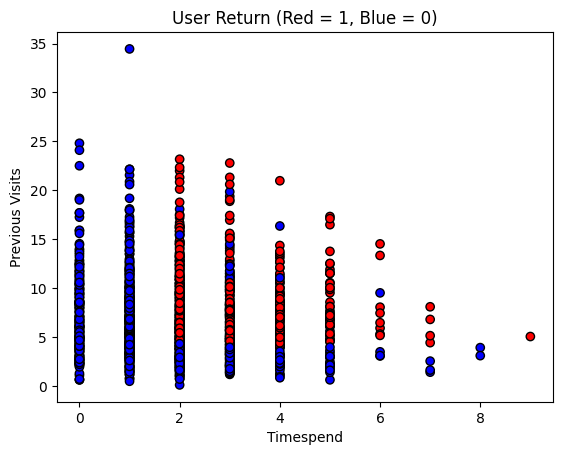

In [43]:
plt.scatter(
    df['Previous Visits'],
    df['Timespend'],
    c=df['Return'],      # 0 or 1
    cmap='bwr',          # blue-white-red
    edgecolors='k'
)
plt.xlabel('Timespend')
plt.ylabel('Previous Visits')
plt.title('User Return (Red = 1, Blue = 0)')
plt.show()
